# Linear Regression Using Tensorflow

Linear Regression is a very common statistical method that allows us to learn a function or relationship from a given set of continuous data. For example, we are given some data points of x and corresponding y and we need to learn the relationship between them that is called a hypothesis.

In case of Linear regression, the hypothesis is a straight line, i.e,
 h(x) = wx + b 
Where w is a vector called Weights and b is a scalar called Bias. The Weights and Bias are called the parameters of the model.

All we need to do is estimate the value of w and b from the given set of data such that the resultant hypothesis produces the least cost J which is defined by the following cost function
 J(w, b) = \frac{1}{2m} \sum_{i=1}^{m} (y_i - h(x_i)) ^ 2 
where m is the number of data points in the given dataset. This cost function is also called Mean Squared Error.

For finding the optimized value of the parameters for which J is minimum, we will be using a commonly used optimizer algorithm called Gradient Descent.

Repeat untill Convergence {
    w = w - α * δJ/δw
    b = b - α * δJ/δb}
}

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf

In [30]:
# Creating 50 data points between 0 and 50
x, y = np.linspace(0, 50, 50), np.linspace(0, 50, 50)

In [31]:
# Adding some variance to data points
x += np.random.uniform(-5, 5, 50); y += np.random.uniform(-5, 5, 50)

## Plotting the data points

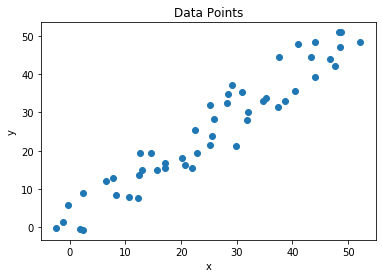

In [32]:
plt.scatter(x, y)
plt.xlabel("x"); plt.ylabel("y")
plt.title("Data Points")
plt.show()

## Training Process

Now we will start creating our model by defining the placeholders X and Y, so that we can feed our training examples X and Y into the optimizer during the training process.

In [11]:
X = tf.placeholder("float"); Y =tf.placeholder("float")

In [13]:
# Initially we randomly assign weights and bias
w = tf.Variable(np.random.randn(), name = "w")
b = tf.Variable(np.random.randn(), name = "b")

Now we will define the hyperparameters of the model, the Learning Rate and the number of Epochs.

In [14]:
learning_rate = 0.01
training_epochs = 1000

In [26]:
# Hypothesis
y_pred = tf.add(tf.multiply(X,w), b)

# Cost function
cost = tf.reduce_sum(tf.pow(y_pred - Y, 2)) / (2*len(x))

# Gradient Boost
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Global variable initializer
init = tf.global_variables_initializer()

Now we begin the training process

In [33]:
with tf.Session() as sess: 
    
    # Initializing the Variables 
    sess.run(init) 
      
    # Iterating through all the epochs 
    for epoch in range(training_epochs): 
          
        # Feeding each data point into the optimizer using Feed Dictionary 
        for (_x, _y) in zip(x, y): 
            sess.run(optimizer, feed_dict = {X : _x, Y : _y}) 
          
        # Displaying the result after every 50 epochs 
        if (epoch + 1) % 50 == 0: 
            # Calculating the cost a every epoch 
            c = sess.run(cost, feed_dict = {X : x, Y : y}) 
            print("Epoch", (epoch + 1), ": cost =", c, "W =", sess.run(w), "b =", sess.run(b)) 
      
    # Storing necessary values to be used outside the Session 
    training_cost = sess.run(cost, feed_dict ={X: x, Y: y}) 
    weight = sess.run(w)
    bias = sess.run(b) 

Epoch 50 : cost = 9.627223 W = 1.0055951 b = 0.3942251
Epoch 100 : cost = 9.593199 W = 1.0015764 b = 0.5904001
Epoch 150 : cost = 9.573628 W = 0.9979937 b = 0.7652986
Epoch 200 : cost = 9.564734 W = 0.9947995 b = 0.9212307
Epoch 250 : cost = 9.563605 W = 0.99195164 b = 1.0602521
Epoch 300 : cost = 9.568003 W = 0.9894126 b = 1.1841966
Epoch 350 : cost = 9.5762205 W = 0.9871489 b = 1.2947047
Epoch 400 : cost = 9.586966 W = 0.9851308 b = 1.393222
Epoch 450 : cost = 9.599257 W = 0.98333156 b = 1.4810561
Epoch 500 : cost = 9.612372 W = 0.9817274 b = 1.5593644
Epoch 550 : cost = 9.625782 W = 0.98029715 b = 1.6291847
Epoch 600 : cost = 9.6391 W = 0.979022 b = 1.6914316
Epoch 650 : cost = 9.652059 W = 0.9778851 b = 1.7469306
Epoch 700 : cost = 9.664473 W = 0.97687155 b = 1.7964102
Epoch 750 : cost = 9.676224 W = 0.9759679 b = 1.8405237
Epoch 800 : cost = 9.687246 W = 0.9751623 b = 1.879849
Epoch 850 : cost = 9.697504 W = 0.9744441 b = 1.9149098
Epoch 900 : cost = 9.706993 W = 0.97380376 b = 1.

## Looking at the results

In [34]:
predictions = (weight * x) + bias
print("Training cost = ", training_cost, "\nWeight = ", weight, "\nbias", bias)

Training cost =  9.723735 
Weight =  0.972724 
bias 1.9988819


## Plotting the Results

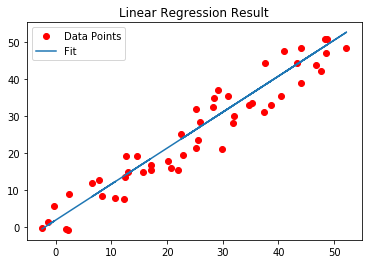

In [36]:
plt.plot(x, y, "ro", label = "Data Points")
plt.plot(x, predictions, label = "Fit")
plt.title("Linear Regression Result")
plt.legend()
plt.show()